In [1]:
from datetime import datetime
from datetime import timedelta
import shapefile
import xml.etree.ElementTree as ET
import numpy as np
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
import matplotlib.pyplot as plt
from pyproj import Proj, transform
from pymongo import MongoClient
%matplotlib inline

In [2]:
tree = ET.parse('/media/amassaro/external_2T/telecom_bigdata_2015/data/external_data/xml_incidenti_mar-apr_2015.xml')
root=tree.getroot()
child=list(root)[1]

In [3]:
acc_times=[]
place=[]
for j in child:
    if 'Latitudine' in j.attrib.keys() and 'Longitudine' in j.attrib.keys():
        place.append([float(j.attrib['Longitudine']),float(j.attrib['Latitudine'])])
        acc_times.append(j.attrib['DataOraIncidente'])

acc_times=np.array([datetime.strptime(t[:10]+' '+t[11:],'%Y-%m-%d %H:%M:%S') for t in acc_times])
place=np.array(place)

In [4]:
db=MongoClient()
db=db['call_out_roma']
cur=db['callOut'].find().sort('time_interval')

In [5]:
times_call_in=[]
calls=[]
for c in cur:
    times_call_in.append(datetime.fromtimestamp(c['time_interval']))
    calls.append(c['n_of_calls'])
    
times_call_in=np.array(times_call_in)
calls=np.array(calls)

In [6]:
Times=list(set(times_call_in))
Times=np.array(Times)
Times=np.sort(Times)
I_times=np.argsort(times_call_in)
times_call_in_sorted=np.sort(times_call_in)
calls_sorted=calls[I_times]

In [7]:
Calls=[]
current_call=calls_sorted[0]
current_time=times_call_in_sorted[0]
for i in range(1,len(times_call_in_sorted)):
    if times_call_in_sorted[i]!=times_call_in_sorted[i-1]:
        Calls.append(current_call)
        current_call=calls_sorted[i]
    else:
        current_call+=calls_sorted[i]
Calls.append(current_call)

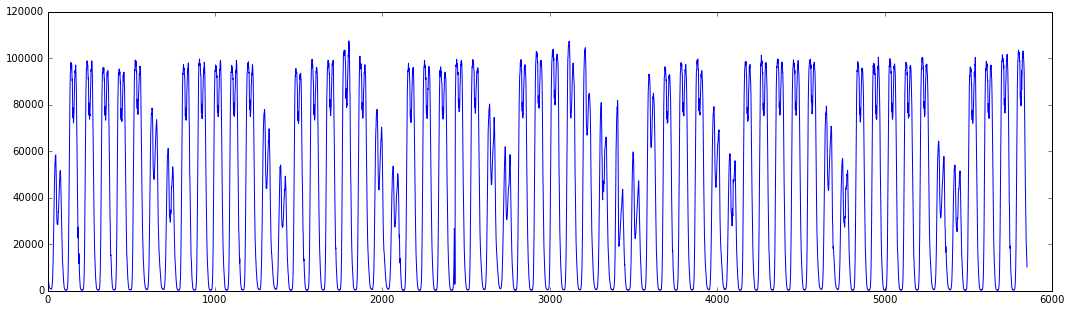

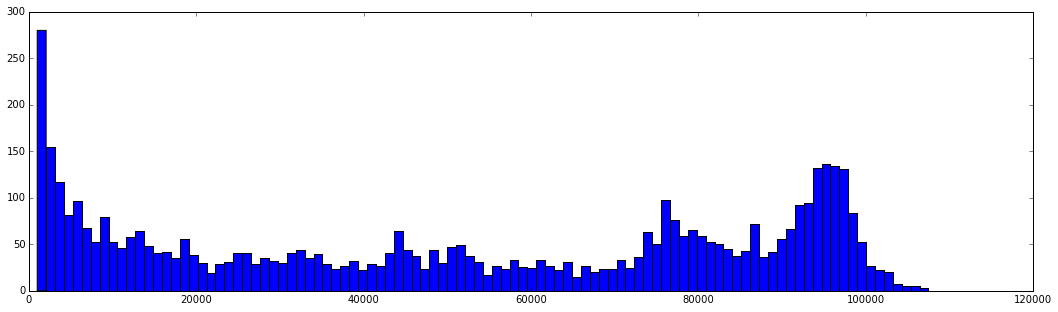

In [8]:
Calls=np.array(Calls)
plt.plot(Calls)
plt.gcf().set_size_inches(18, 5)
plt.show()
plt.hist(Calls[Calls>1000],100)
plt.gcf().set_size_inches(18, 5)
plt.show()

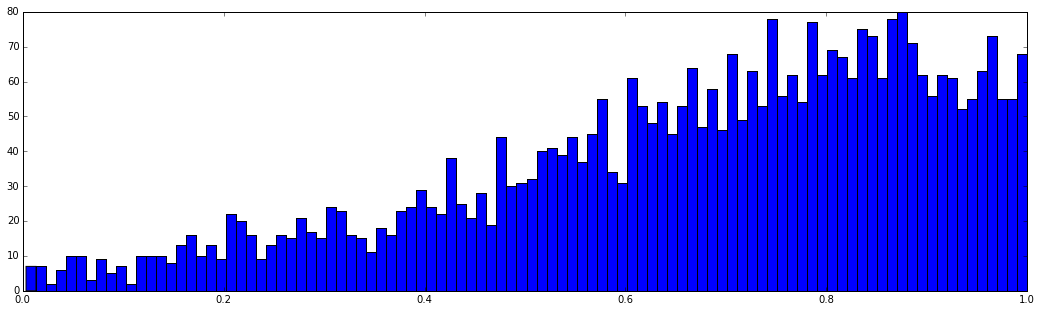

entropy:  4.38855325993


In [9]:
sorted_Calls=np.sort(Calls)
P=[]
L=float(len(Calls))
count=0
for t in acc_times:
    for i in range(len(Times)-1):
        if abs((t-Times[i+1]).total_seconds())>abs((t-Times[i]).total_seconds()):
            break
    ii=np.where(sorted_Calls==Calls[i])[0][0]
    P.append(ii/L)
plt.hist(P,100)
plt.gcf().set_size_inches(18, 5)
plt.show()
H=np.histogram(P,100)
print'entropy: ',sum([-x*np.log(x) for x in H[0]/float(np.sum(H[0]))])

hourly data


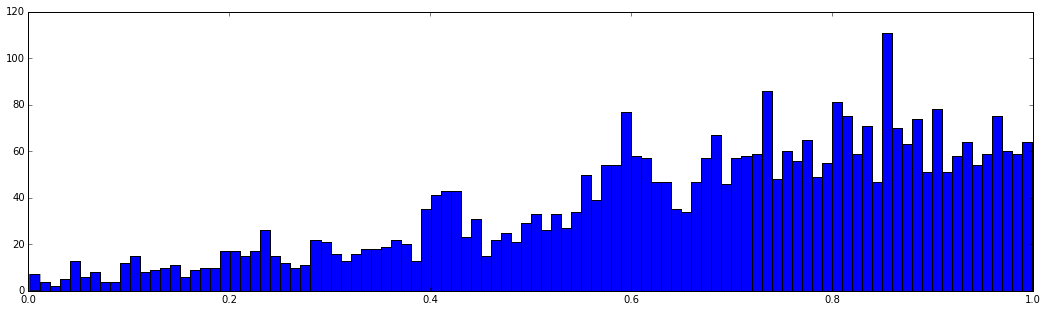

entropy:  4.37622274272


In [10]:
Times_H=np.array(list(set([t.replace(minute=0,second=0) for t in Times])))
Times_H=np.sort(Times_H)
times_call_in_sorted_H=np.array([t.replace(minute=0,second=0) for t in times_call_in_sorted])
Calls_H=[]
current_call=calls_sorted[0]
current_time=times_call_in_sorted_H[0]
for i in range(1,len(times_call_in_sorted_H)):
    if times_call_in_sorted_H[i]!=times_call_in_sorted_H[i-1]:
        Calls_H.append(current_call)
        current_call=calls_sorted[i]
    else:
        current_call+=calls_sorted[i]
Calls_H.append(current_call)
sorted_Calls_H=np.sort(Calls_H)
P=[]
X=[]
L=float(len(Calls_H))
acc_times_H=[t.replace(minute=0,second=0) for t in acc_times]
count=0
for t in acc_times_H:
    i=np.where(Times_H==t)[0][0]
    ii=np.where(sorted_Calls_H==Calls_H[i])[0][0]
    P.append(ii/L)
plt.hist(P,100)
plt.gcf().set_size_inches(18, 5)
print 'hourly data'
plt.show()
H=np.histogram(P,100)
print'entropy: ',sum([-x*np.log(x) for x in H[0]/float(np.sum(H[0])) if x])

lag 1


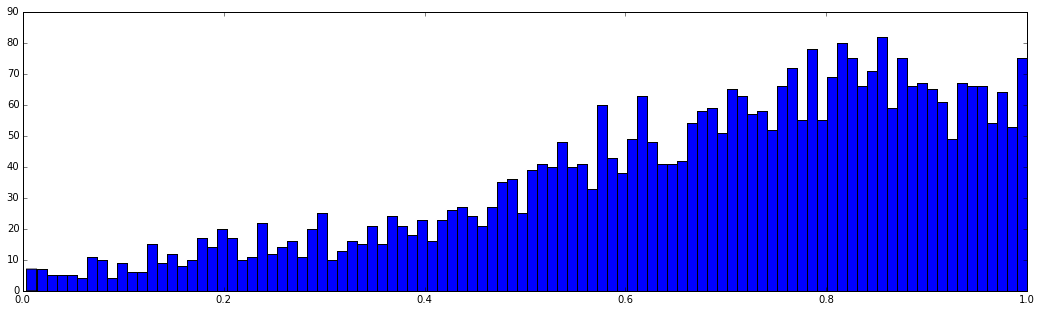

entropy:  4.38365181581


In [11]:
sorted_Calls=np.sort(Calls)
P1=[]
L=float(len(Calls))
count=0
for t in acc_times:
    for i in range(len(Times)-1):
        if abs((t-Times[i+1]).total_seconds())>abs((t-Times[i]).total_seconds()):
            break
    ii=len(Calls)-1
    if i-1<len(Calls):
        ii=np.where(sorted_Calls==Calls[i+1])[0][0]      
    P1.append(ii/L)
print 'lag 1'
plt.hist(P1,100)
plt.gcf().set_size_inches(18, 5)
plt.show()
H=np.histogram(P1,100)
print'entropy: ',sum([-x*np.log(x) for x in H[0]/float(np.sum(H[0]))])

lag 2


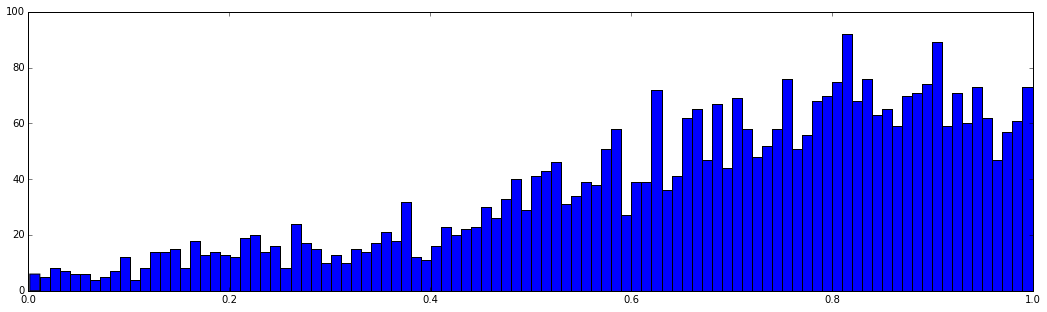

entropy:  4.37054127168


In [12]:
sorted_Calls=np.sort(Calls)
P2=[]
L=float(len(Calls))
count=0
for t in acc_times:
    for i in range(len(Times)-1):
        if abs((t-Times[i+1]).total_seconds())>abs((t-Times[i]).total_seconds()):
            break
    ii=len(Calls)-1
    if i-2<len(Calls):
        ii=np.where(sorted_Calls==Calls[i+2])[0][0]
    P2.append(ii/L)
plt.hist(P2,100)
plt.gcf().set_size_inches(18, 5)
print 'lag 2'
plt.show()
H=np.histogram(P2,100)
print'entropy: ',sum([-x*np.log(x) for x in H[0]/float(np.sum(H[0]))])

lag 3


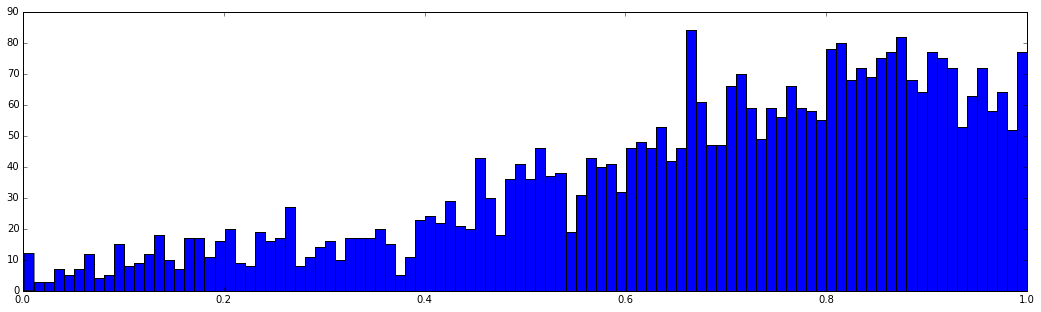

entropy:  4.36843383382


In [13]:
sorted_Calls=np.sort(Calls)
P3=[]
L=float(len(Calls))
count=0
for t in acc_times:
    for i in range(len(Times)-1):
        if abs((t-Times[i+1]).total_seconds())>abs((t-Times[i]).total_seconds()):
            break
    ii=len(Calls)-1
    if i+3<len(Calls):
        ii=np.where(sorted_Calls==Calls[i+3])[0][0]
    P3.append(ii/L)
plt.hist(P3,100)
plt.gcf().set_size_inches(18, 5)
print 'lag 3'
plt.show()
H=np.histogram(P3,100)
print'entropy: ',sum([-x*np.log(x) for x in H[0]/float(np.sum(H[0])) if x])

weekends


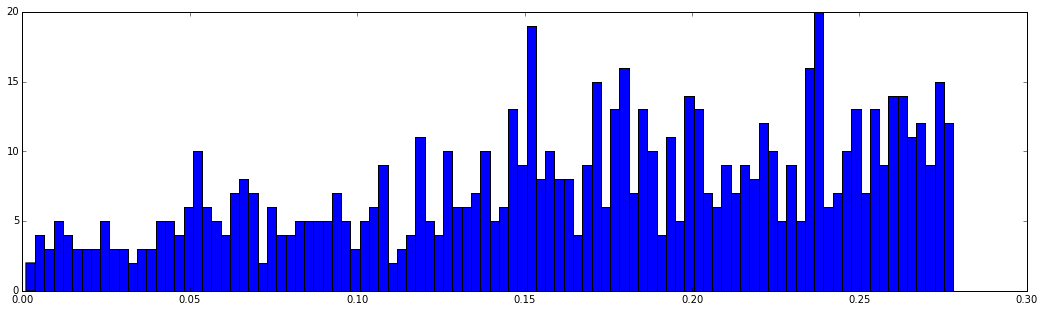

entropy:  4.47176241084


In [14]:
Times_w=np.array([t for t in Times if t.weekday() in [5,6]])
times_call_in_sorted_w=np.array([t for t in times_call_in_sorted if t.weekday() in [5,6]])
Calls_w=[]
current_call=calls_sorted[0]
for i in range(1,len(times_call_in_sorted_w)):
    if times_call_in_sorted_w[i]!=times_call_in_sorted_w[i-1]:
        Calls_w.append(current_call)
        current_call=calls_sorted[i]
    else:
        current_call+=calls_sorted[i]
Calls_w.append(current_call)


sorted_Calls_w=np.sort(Calls_w)
P_w=[]
L_w=float(len(Calls_w))
count=0
for t in acc_times:
    if t.weekday() in [5,6]:
        for i in range(len(Times_w)-1):
            if abs((t-Times_w[i+1]).total_seconds())>abs((t-Times_w[i]).total_seconds()):
                break
        ii=np.where(sorted_Calls_w==Calls_w[i])[0][0]
        P_w.append(ii/L)
plt.hist(P_w,100)
plt.gcf().set_size_inches(18, 5)
print 'weekends'
plt.show()
H=np.histogram(P_w,100)
print'entropy: ',sum([-x*np.log(x) for x in H[0]/float(np.sum(H[0]))])

weekdays


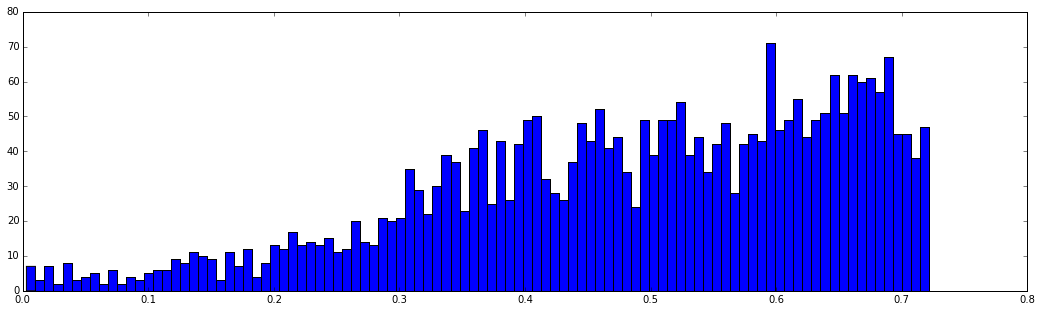

entropy:  4.36186077826


In [15]:
Times_w=np.array([t for t in Times if t.weekday() in [0,1,2,3,4]])
times_call_in_sorted_w=np.array([t for t in times_call_in_sorted if t.weekday() in [0,1,2,3,4]])
Calls_w=[]
current_call=calls_sorted[0]
for i in range(1,len(times_call_in_sorted_w)):
    if times_call_in_sorted_w[i]!=times_call_in_sorted_w[i-1]:
        Calls_w.append(current_call)
        current_call=calls_sorted[i]
    else:
        current_call+=calls_sorted[i]
Calls_w.append(current_call)


sorted_Calls_w=np.sort(Calls_w)
P_w=[]
L_w=float(len(Calls_w))
count=0
for t in acc_times:
    if t.weekday() in [0,1,2,3,4]:
        for i in range(len(Times_w)-1):
            if abs((t-Times_w[i+1]).total_seconds())>abs((t-Times_w[i]).total_seconds()):
                break
        ii=np.where(sorted_Calls_w==Calls_w[i])[0][0]
        P_w.append(ii/L)
plt.hist(P_w,100)
plt.gcf().set_size_inches(18, 5)
print 'weekdays'
plt.show()
H=np.histogram(P_w,100)
print'entropy: ',sum([-x*np.log(x) for x in H[0]/float(np.sum(H[0])) if x])

weekdays lag 1


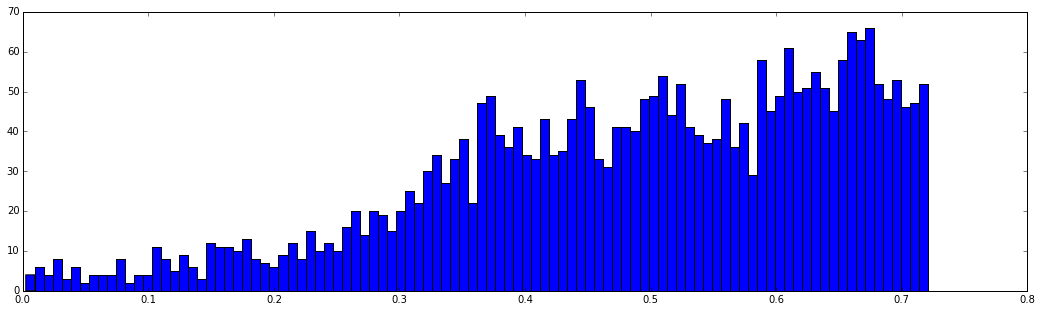

entropy:  4.36292550214


In [16]:
Times_w=np.array([t for t in Times if t.weekday() in [0,1,2,3,4]])
times_call_in_sorted_w=np.array([t for t in times_call_in_sorted if t.weekday() in [0,1,2,3,4]])
Calls_w=[]
current_call=calls_sorted[0]
for i in range(1,len(times_call_in_sorted_w)):
    if times_call_in_sorted_w[i]!=times_call_in_sorted_w[i-1]:
        Calls_w.append(current_call)
        current_call=calls_sorted[i]
    else:
        current_call+=calls_sorted[i]
Calls_w.append(current_call)


sorted_Calls_w=np.sort(Calls_w)
P_w=[]
L_w=float(len(Calls_w))
count=0
for t in acc_times:
    if t.weekday() in [0,1,2,3,4]:
        for i in range(len(Times_w)-1):
            if abs((t-Times_w[i+1]).total_seconds())>abs((t-Times_w[i]).total_seconds()):
                break
        ii=np.where(sorted_Calls_w==Calls_w[i+1])[0][0]
        P_w.append(ii/L)
plt.hist(P_w,100)
plt.gcf().set_size_inches(18, 5)
print 'weekdays lag 1'
plt.show()
H=np.histogram(P_w,100)
print'entropy: ',sum([-x*np.log(x) for x in H[0]/float(np.sum(H[0])) if x])

weekdays lag 2


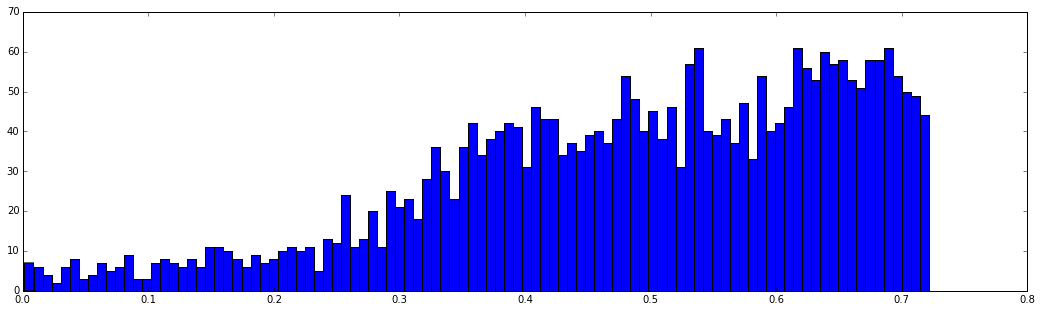

entropy:  4.36354591567


In [17]:
Times_w=np.array([t for t in Times if t.weekday() in [0,1,2,3,4]])
times_call_in_sorted_w=np.array([t for t in times_call_in_sorted if t.weekday() in [0,1,2,3,4]])
Calls_w=[]
current_call=calls_sorted[0]
for i in range(1,len(times_call_in_sorted_w)):
    if times_call_in_sorted_w[i]!=times_call_in_sorted_w[i-1]:
        Calls_w.append(current_call)
        current_call=calls_sorted[i]
    else:
        current_call+=calls_sorted[i]
Calls_w.append(current_call)


sorted_Calls_w=np.sort(Calls_w)
P_w=[]
L_w=float(len(Calls_w))
count=0
for t in acc_times:
    if t.weekday() in [0,1,2,3,4]:
        for i in range(len(Times_w)-1):
            if abs((t-Times_w[i+1]).total_seconds())>abs((t-Times_w[i]).total_seconds()):
                break
        ii=np.where(sorted_Calls_w==Calls_w[i+2])[0][0]
        P_w.append(ii/L)
plt.hist(P_w,100)
plt.gcf().set_size_inches(18, 5)
print 'weekdays lag 2'
plt.show()
H=np.histogram(P_w,100)
print'entropy: ',sum([-x*np.log(x) for x in H[0]/float(np.sum(H[0])) if x])

weekdays lag 3


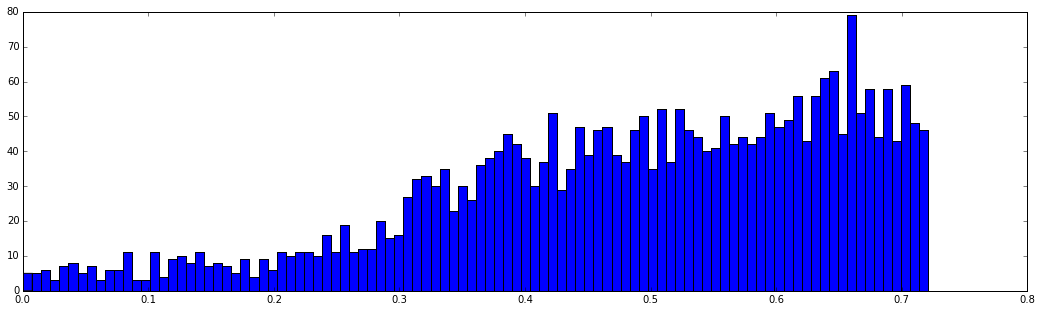

entropy:  4.36432092758


In [18]:
Times_w=np.array([t for t in Times if t.weekday() in [0,1,2,3,4]])
times_call_in_sorted_w=np.array([t for t in times_call_in_sorted if t.weekday() in [0,1,2,3,4]])
Calls_w=[]
current_call=calls_sorted[0]
for i in range(1,len(times_call_in_sorted_w)):
    if times_call_in_sorted_w[i]!=times_call_in_sorted_w[i-1]:
        Calls_w.append(current_call)
        current_call=calls_sorted[i]
    else:
        current_call+=calls_sorted[i]
Calls_w.append(current_call)


sorted_Calls_w=np.sort(Calls_w)
P_w=[]
L_w=float(len(Calls_w))
count=0
for t in acc_times:
    if t.weekday() in [0,1,2,3,4]:
        for i in range(len(Times_w)-1):
            if abs((t-Times_w[i+1]).total_seconds())>abs((t-Times_w[i]).total_seconds()):
                break
        ii=np.where(sorted_Calls_w==Calls_w[i+3])[0][0]
        P_w.append(ii/L)
plt.hist(P_w,100)
plt.gcf().set_size_inches(18, 5)
print 'weekdays lag 3'
plt.show()
H=np.histogram(P_w,100)
print'entropy: ',sum([-x*np.log(x) for x in H[0]/float(np.sum(H[0])) if x])